# Using your store items data:

In [61]:
import acquire as a 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [15]:
df = a.get_store_data()

### Convert date column to datetime format.

In [20]:
df ['sale_date']= pd.to_datetime(df['sale_date'])



### Plot the distribution of sale_amount and item_price.

<Axes: >

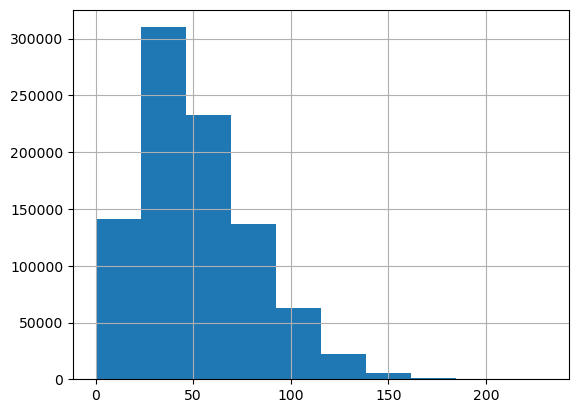

In [25]:
df.sale_amount.hist()

<Axes: >

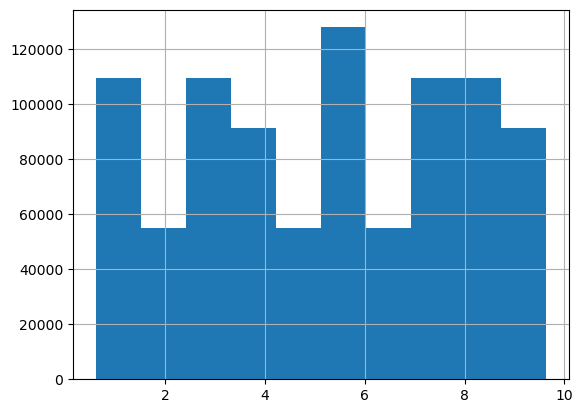

In [26]:
df.item_price.hist()

### Set the index to be the datetime variable.

In [24]:
df = df.set_index('sale_date').sort_index()

### Add a 'month' and 'day of week' column to your dataframe.

In [28]:
df['month'] = df.index.month_name()
df['day'] = df.index.day_name()

### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [34]:
#first lets look at out variables 
df['total_price'] = df['item_price'] * df['sale_amount']

In [35]:
df.head(1)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day,total_price
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92


### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [41]:
def prepare_store_data():
    import acquire as a
    import pandas as pd 
    import os
    df = a.get_store_data()
    df ['sale_date']= pd.to_datetime(df['sale_date'])
    df = df.set_index('sale_date').sort_index()
    df['month'] = df.index.month_name()
    df['day'] = df.index.day_name()
    df['total_price'] = df['item_price'] * df['sale_amount']
    return df

In [42]:
df_preped = prepare_store_data()

In [44]:
df_preped.head(1)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day,total_price
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92


# Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [45]:
g_df = a.get_germany_data()

### Convert date column to datetime format.

In [52]:
((g_df.head(5).isna().sum()) / len(g_df) ) * 100
g_df.columns = g_df.columns.str.lower()

### Plot the distribution of each of your variables.

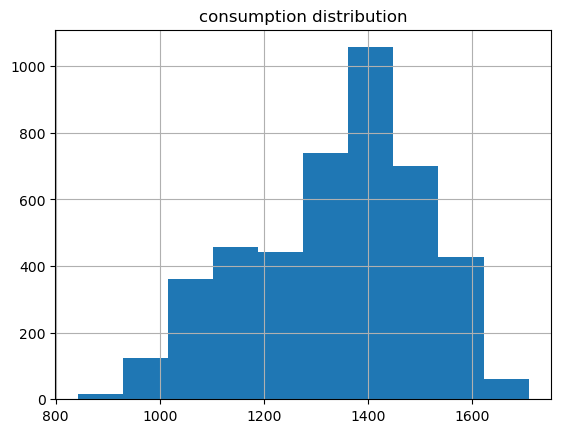

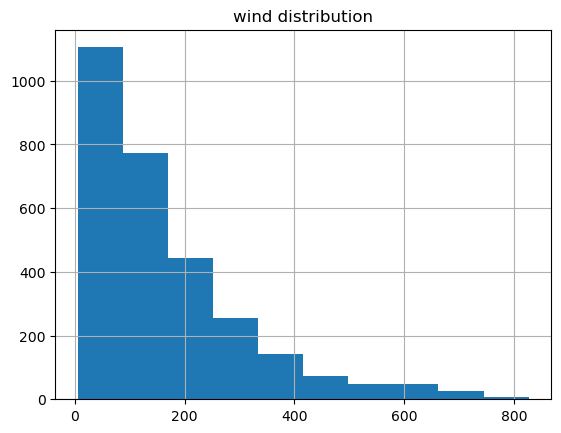

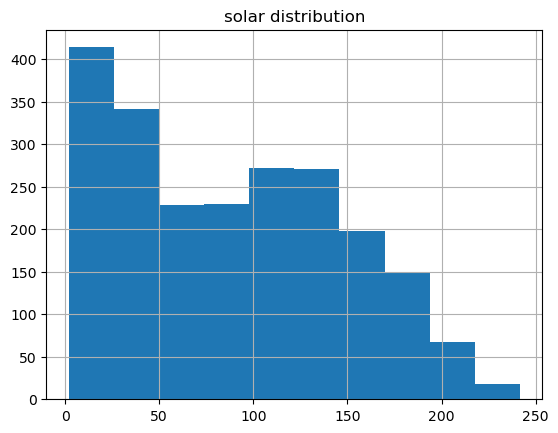

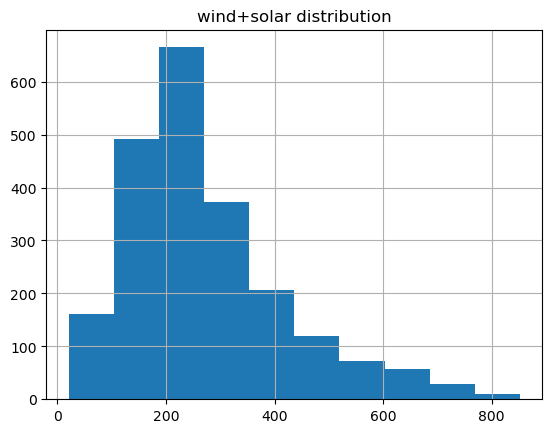

In [60]:
for cols in g_df.columns:
    g_df[cols].hist()
    plt.title(f'{cols} distribution')
    plt.show()

### Set the index to be the datetime variable.

In [87]:
# move this one 
g_df = a.get_germany_data()
g_df.columns = g_df.columns.str.lower()
g_df['date'] = pd.to_datetime(g_df['date'])
g_df = g_df.set_index('date').sort_index()

In [56]:
g_df['date'] = pd.to_datetime(g_df['date'])
g_df = g_df.set_index('date').sort_index()

### Add a month and a year column to your dataframe.

In [62]:
g_df['month'] = g_df.index.month_name()
g_df['day'] = g_df.index.day_name()

### Fill any missing values.

In [71]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform(g_df['wind'].values.reshape(-1, 1))
# X = g_df['wind'].values.reshape(-1, 1)
# print(imp_mean.transform(X))


array([[164.8141726],
       [164.8141726],
       [164.8141726],
       ...,
       [584.277    ],
       [721.247    ],
       [721.176    ]])

In [79]:
g_df['wind'] = imp_mean.transform(X)

In [83]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform(g_df['solar'].values.reshape(-1, 1))
X = g_df['solar'].values.reshape(-1, 1)
g_df['solar'] = imp_mean.transform(X)

In [82]:
g_df.isna().sum()

consumption       0
wind              0
solar          2195
wind+solar     2196
month             0
day               0
dtype: int64

In [85]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform(g_df['wind+solar'].values.reshape(-1, 1))
X = g_df['wind+solar'].values.reshape(-1, 1)
g_df['wind+solar'] = imp_mean.transform(X)

In [86]:
g_df.isna().sum()

consumption    0
wind           0
solar          0
wind+solar     0
month          0
day            0
dtype: int64

### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate 

### functions and be able to re-run the functions and get the same results.